# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Drexel Hill, Pennsylvania, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Drexel Hill, Pennsylvania, United States** to Ann Arbor, USA. In that case at least one source file must be about **Drexel Hill, Pennsylvania, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Drexel Hill, Pennsylvania, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [500]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

## read table from wiki urls for English premier leauge standings after 2000
years_from = np.arange('2000', '2018', dtype='datetime64[Y]')
years_to = years_from + 1

## creat an empty whole dataframe 
df_all = pd.DataFrame(columns = ['Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts'])
#print(df_all.columns)

for year_from, year_to in zip(years_from, years_to):
    start = str(year_from)
    end = str(year_to)[2:]
    #print(start, end)
    if int(start) < 2007:
        r = requests.get('https://en.wikipedia.org/wiki/Template:{}–{}_FA_Premier_League_table'.format(start,end))
    else:
        r = requests.get('https://en.wikipedia.org/wiki/Template:{}–{}_Premier_League_table'.format(start,end))
    dfs=pd.read_html(r.content)
    ## remove miscellaneous columns
    df = dfs[0].iloc[:,:10]
    ## filter NaN rows in 2011-12 season
    df = df.loc[~df.isnull().any(axis=1)]
    ## remove label (C) and (R), [vte] in team column
    df.iloc[:,1] = df.iloc[:,1].str.replace(' \(C\)| \(R\)|\[ vte \]','')
    ## set first row as header
    df.rename(columns=df.iloc[0],inplace=True)
    df.drop(df.index[0],inplace=True)
    ## extract the big six of nowdays: ManU, Arsenal, Chelsea, ManC, Liverpool, Hotspur
    ## ManC was relegated in 2001-02
    df6 = df[df['Team'].isin(['Manchester United','Arsenal','Liverpool','Chelsea','Tottenham Hotspur','Manchester City'])]
    df6 = df6.assign(Season=str(start) + '-' + str(end))
    ## combine each year standings to one dataframe
    df_all = df_all.append(df6,sort=False)

df_all['Win Rate'] = (df_all['W'].astype(int)/38*100).round(1)
df_all['Unbeaten Runs'] = df_all['W'].astype(int) + df_all['D'].astype(int)



<IPython.core.display.Javascript object>


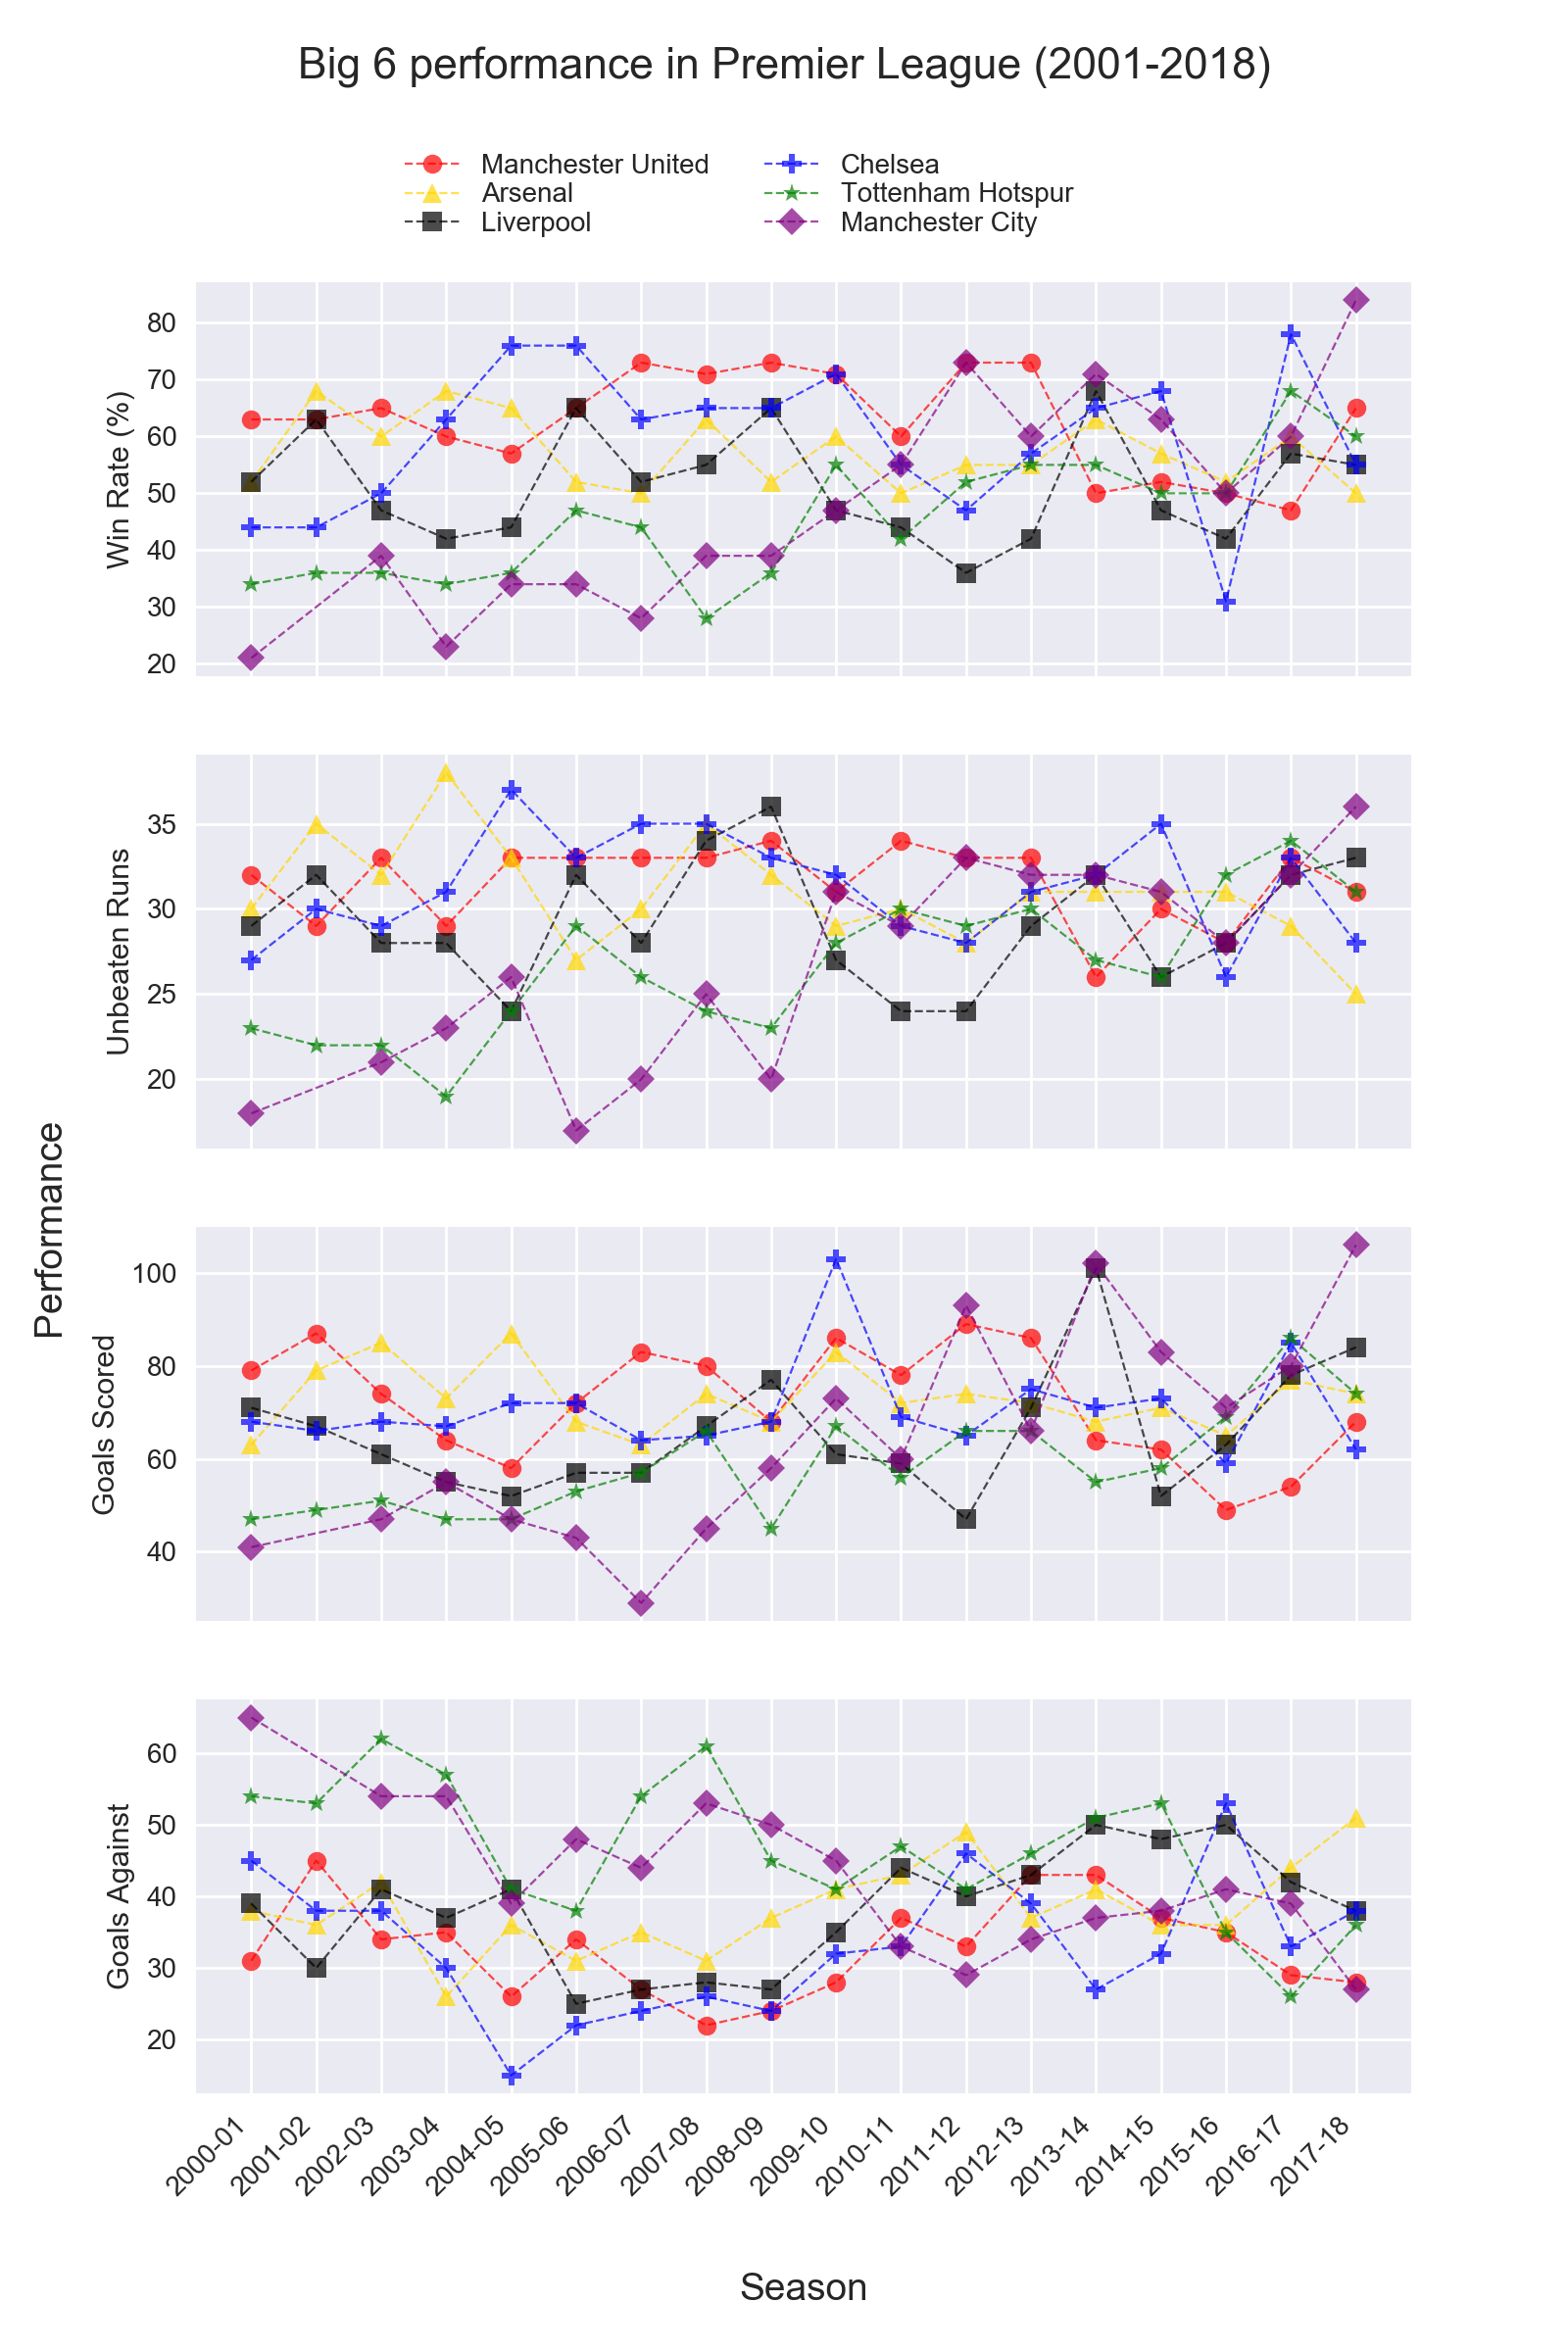

In [501]:

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(4,1,figsize=(8,12),sharex=True)
plt.suptitle("Big 6 performance in Premier League (2001-2018)",x=0.5,y=0.98,fontsize=16)
## creat several dictionaries, using colors,line type, joint type etc as values
colors={'Manchester United':'red','Arsenal':'gold','Liverpool':'black','Chelsea':'blue',\
        'Tottenham Hotspur':'green','Manchester City':'purple'}

markers={'Manchester United':'o','Arsenal':'^','Liverpool':'s','Chelsea':'P',\
        'Tottenham Hotspur':'*','Manchester City':'D'}


for team_name in df_all['Team'].unique():
    
    team=df_all[df_all['Team']==team_name]
    
    ax[0].plot(team['Season'],team['Win Rate'].astype(int),label=team_name, \
               color=colors[team_name],linestyle='--',linewidth=0.8, \
               marker=markers[team_name],alpha=0.7)
    ax[0].set_ylabel('Win Rate (%)')
    
    ax[1].plot(team['Season'],team['Unbeaten Runs'].astype(int),label=team_name,\
               color=colors[team_name],linestyle='--',linewidth=0.8, \
               marker=markers[team_name],alpha=0.7)
    ax[1].set_ylabel('Unbeaten Runs')
    
    ax[2].plot(team['Season'],team['GF'].astype(int),label=team_name,\
               color=colors[team_name],linestyle='--',linewidth=0.8, \
               marker=markers[team_name],alpha=0.7)
    ax[2].set_ylabel('Goals Scored')
    
    ax[3].plot(team['Season'],team['GA'].astype(int),label=team_name,\
               color=colors[team_name],linestyle='--',linewidth=0.8, \
               marker=markers[team_name],alpha=0.7)
    ax[3].set_ylabel('Goals Against')
    
    for tick in ax[3].get_xticklabels():
        tick.set_rotation(45)
        tick.set_horizontalalignment("right")

plt.text(0.5, -0.5, 'Season', ha='center', va='center',transform=ax[3].transAxes,fontsize=14)
plt.text(-0.12, 2.2, 'Performance', ha='center', va='center', rotation='vertical',transform=ax[3].transAxes,fontsize=14)
handles, labels = ax[0].get_legend_handles_labels()
legend=plt.figlegend(handles, labels, bbox_to_anchor=(0.7, 0.945), ncol=2, labelspacing=0.12)


<IPython.core.display.Javascript object>


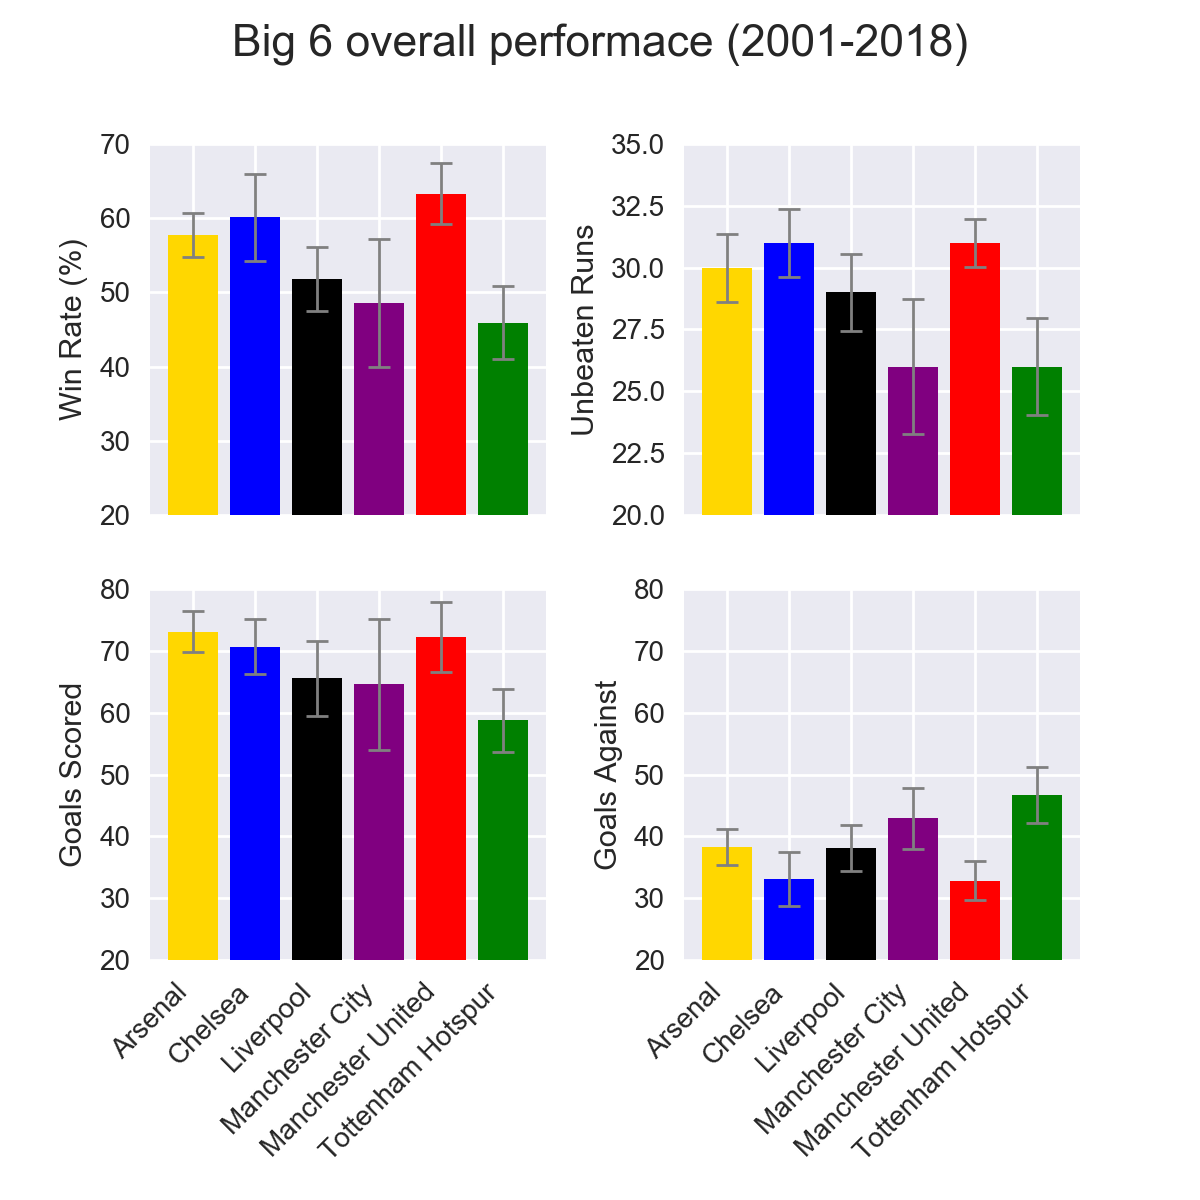

In [502]:
from collections import OrderedDict

## build a dataframe to store the overall performance (average performance)
df_all[['GF','GA']] = df_all[['GF','GA']].apply(pd.to_numeric)
df_mean = df_all.groupby('Team')['Win Rate','Unbeaten Runs','GF','GA'].mean().round(1)
df_se = df_all.groupby('Team')['Win Rate','Unbeaten Runs','GF','GA'].sem().round(1)

fig, ax = plt.subplots(2,2,figsize=(6,6),sharex=True)
## order colors by team name to consistent with df_mean and df_se
colors = OrderedDict(sorted(colors.items()))

ax[0,0].bar(df_mean.index, df_mean['Win Rate'], yerr=df_se['Win Rate']*1.96, ecolor='grey', \
            error_kw=dict(lw=1, capsize=4, capthick=1), color=colors.values()) 
ax[0,0].set_ylabel('Win Rate (%)')
ax[0,0].set_ylim(20,70)

ax[0,1].bar(df_mean.index, df_mean['Unbeaten Runs'].astype(int),yerr=df_se['Unbeaten Runs']*1.96, \
            error_kw=dict(lw=1, capsize=4, capthick=1),ecolor='grey', color=colors.values())
ax[0,1].set_ylabel('Unbeaten Runs')
ax[0,1].set_ylim(20,35)

ax[1,0].bar(df_mean.index, df_mean['GF'], yerr=df_se['GF']*1.96, ecolor='grey', \
            error_kw=dict(lw=1, capsize=4, capthick=1),color=colors.values())
for tick in ax[1,0].get_xticklabels(): 
    tick.set_rotation(45)
    tick.set_horizontalalignment("right")
ax[1,0].set_ylabel('Goals Scored')
ax[1,0].set_ylim(20,80)

ax[1,1].bar(df_mean.index, df_mean['GA'], yerr=df_se['GA']*1.96, ecolor='grey', \
            error_kw=dict(lw=1, capsize=4, capthick=1),color=colors.values())
for tick in ax[1,1].get_xticklabels(): 
    tick.set_rotation(45)
    tick.set_horizontalalignment("right")

ax[1,1].set_ylabel('Goals Against')
ax[1,1].set_ylim(20,80)

plt.suptitle('Big 6 overall performace (2001-2018)',fontsize=16)
plt.subplots_adjust(bottom=0.2,wspace=0.35)